# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rangsi Ridho Kayana
- **Email:** rangsikayana@gmail.com
- **ID Dicoding:** rangsikayana

## Menentukan Pertanyaan Bisnis

- Berapa jumlah total sepeda yang dipinjam di setiap musim pada tahun 2011?
- Berapa jumlah total sepeda per bulan yang dipinjam pada tahun 2012?
- Berapa jumlah total sepeda per bulan yang dipinjam oleh peminjam terdaftar maupun tidak pada tahun 2011 sampai 2012?
- Apakah terdapat perbedaan signifikan dalam penggunaan sepeda antara lima jam tertinggi dan lima jam terendah? Jika ya, apa yang menyebabkannya?
- Berapa rata-rata frekuensi sepeda yang dipinjam di hari kerja dan hari libur berdasarkan jam?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Wrangling

### Gathering Data

In [2]:
# Mengimpor pandas dan membaca file day.csv dan hour.csv
day_raw, hour_raw = [pd.read_csv('/content/day.csv'), pd.read_csv('/content/hour.csv')]

### Assessing Data

#### Data Per Hari

In [3]:
day_raw.shape

(731, 16)

In [4]:
day_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_raw.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
117,118,2011-04-28,2,0,4,0,4,1,2,0.617500,0.578929,0.700833,0.320908,569,3489,4058
238,239,2011-08-27,3,0,8,0,6,0,2,0.680000,0.635556,0.850000,0.375617,226,889,1115
374,375,2012-01-10,1,1,1,0,2,1,1,0.308696,0.318826,0.646522,0.187552,173,3425,3598
511,512,2012-05-26,2,1,5,0,6,0,1,0.692500,0.642696,0.732500,0.198992,2855,3681,6536
188,189,2011-07-08,3,0,7,0,5,1,2,0.709167,0.670483,0.757917,0.225129,692,3348,4040


In [6]:
# Menghitung jumlah duplikat
day_duplicate = day_raw.duplicated().sum()
print("Jumlah duplikat:", day_duplicate)

Jumlah duplikat: 0


In [7]:
# Menghitung dan menyortir persentase data yang hilang dalam setiap kolom
day_missing = day_raw.isnull().sum() * 100 / day_raw.shape[0]
day_missing[day_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

#### Data Per Jam

In [8]:
hour_raw.shape

(17379, 17)

In [9]:
hour_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_raw.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9964,9965,2012-02-25,1,1,2,5,0,6,0,2,0.30,0.2727,0.42,0.2985,0,3,3
16024,16025,2012-11-05,4,1,11,9,0,1,1,2,0.30,0.2879,0.52,0.2836,18,239,257
3604,3605,2011-06-04,2,0,6,2,0,6,0,1,0.54,0.5152,0.56,0.1940,18,41,59
13236,13237,2012-07-10,3,1,7,17,0,2,1,1,0.78,0.7121,0.49,0.1940,103,769,872
9142,9143,2012-01-21,1,1,1,20,0,6,0,2,0.18,0.1667,0.80,0.2985,5,62,67


In [11]:
# Menghitung jumlah duplikat
hour_duplicate = hour_raw.duplicated().sum()
print("Jumlah duplikat:", hour_duplicate)

Jumlah duplikat: 0


In [12]:
# Menghitung dan menyortir persentase data yang hilang dalam setiap kolom
hour_missing = hour_raw.isnull().sum() * 100 / hour_raw.shape[0]
hour_missing[hour_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

### Cleaning Data

#### Data Per Hari

In [13]:
# List kolom tidak diperlukan
day_cols_drop = [
    'temp'
    , 'atemp'
    , 'hum'
    , 'windspeed'
]

In [14]:
# Menghapus kolom-kolom yang tidak diperlukan dari data per hari
day_data = day_raw.drop(day_cols_drop, axis=1)

In [15]:
# Mengonversi kolom 'dteday' dari tipe data string menjadi tipe data datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [16]:
day_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
340,341,2011-12-07,4,0,12,0,3,1,3,50,655,705
258,259,2011-09-16,3,0,9,0,5,1,2,742,4018,4760
363,364,2011-12-30,1,0,12,0,5,1,1,491,2508,2999
414,415,2012-02-19,1,1,2,0,0,0,2,618,2071,2689
690,691,2012-11-21,4,1,11,0,3,1,1,615,4531,5146


#### Data Per Jam

In [17]:
# List kolom tidak diperlukan
hour_cols_drop = [
    'temp'
    , 'atemp'
    , 'hum'
    , 'windspeed'
]

In [18]:
# Menghapus kolom-kolom yang tidak diperlukan dari data per jam
hour_data = hour_raw.drop(hour_cols_drop, axis=1)

In [19]:
# Mengonversi kolom 'dteday' dari tipe data string menjadi tipe data datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

In [20]:
hour_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
241,242,2011-01-11,1,0,1,10,0,2,1,2,3,51,54
5833,5834,2011-09-05,3,0,9,12,1,1,0,2,141,212,353
4519,4520,2011-07-12,3,0,7,5,0,2,1,1,4,21,25
9234,9235,2012-01-25,1,1,1,16,0,3,1,1,29,217,246
4866,4867,2011-07-26,3,0,7,16,0,2,1,1,41,213,254


## Exploratory Data Analysis (EDA)

### Explore ...

#### Data Per Hari

<Axes: >

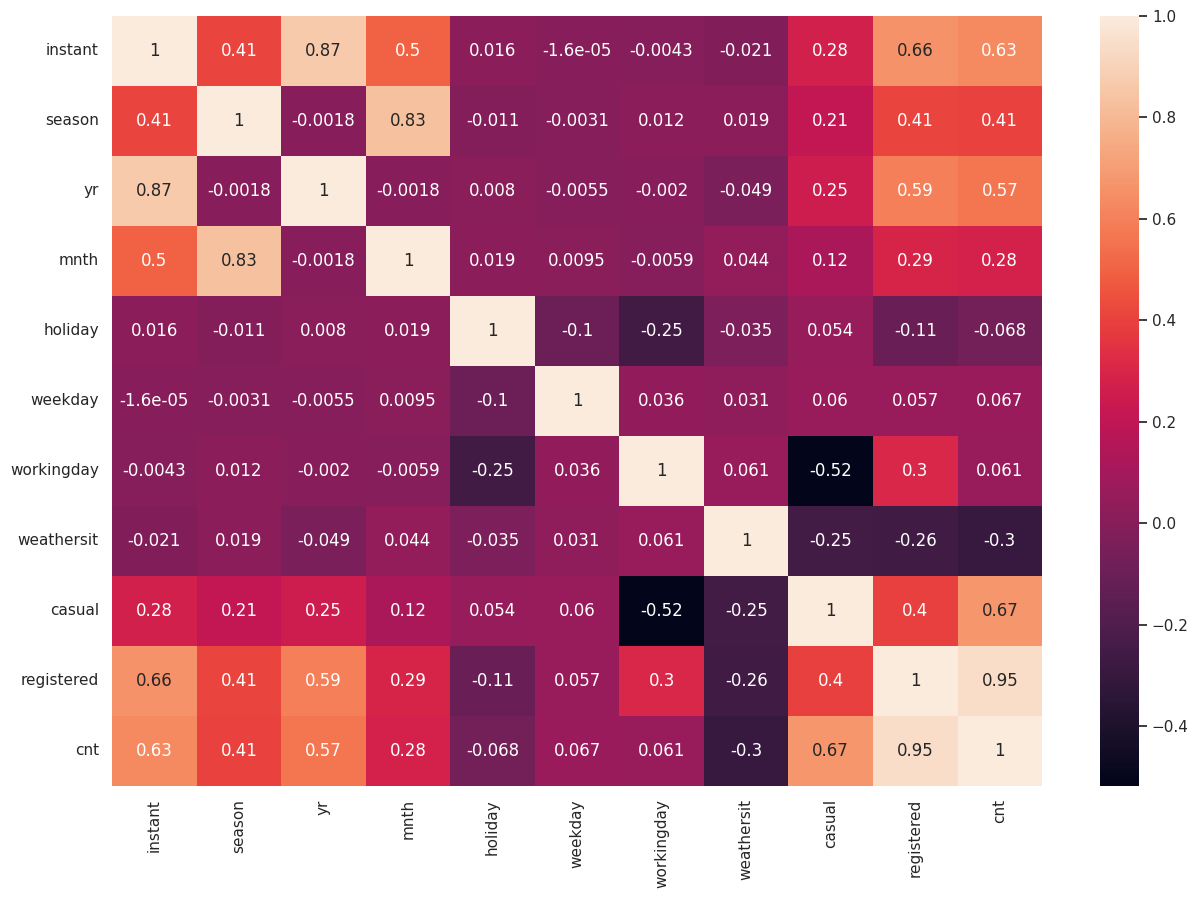

In [21]:
# Membuat plot heatmap dari korelasi data numerik dalam data per hari
plt.figure(figsize=(15, 10))
sns.heatmap(day_data.corr(numeric_only=True), annot=True)

In [22]:
# Menghitung korelasi fitur dan mencari kolom dengan korelasi > 0.7 terhadap kolom lainnya
corr_matrix = day_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
day_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-22-c42998243db7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = day_data.corr().abs()


In [23]:
# Karena kolom berikut krusial maka akan dipertahankan
day_drop_hicorr

['yr', 'mnth', 'cnt']

In [24]:
# Menghitung jumlah nilai unik dalam setiap kolom objek
day_data.select_dtypes(include='object').nunique()

Series([], dtype: float64)

In [25]:
# Menghitung jumlah nilai unik dalam setiap kolom non-objek
day_data.select_dtypes(exclude='object').nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
casual        606
registered    679
cnt           696
dtype: int64

In [26]:
# Mencetak nilai dari setiap kolom non-objek dalam bentuk persentase
for col in day_data.select_dtypes(exclude='object').columns.tolist():
    print(day_data[col].value_counts(normalize=True)*100)
    print('\n')

1      0.136799
481    0.136799
483    0.136799
484    0.136799
485    0.136799
         ...   
246    0.136799
247    0.136799
248    0.136799
249    0.136799
731    0.136799
Name: instant, Length: 731, dtype: float64


2011-01-01    0.136799
2012-04-25    0.136799
2012-04-27    0.136799
2012-04-28    0.136799
2012-04-29    0.136799
                ...   
2011-09-03    0.136799
2011-09-04    0.136799
2011-09-05    0.136799
2011-09-06    0.136799
2012-12-31    0.136799
Name: dteday, Length: 731, dtype: float64


3    25.718194
2    25.170999
1    24.760602
4    24.350205
Name: season, dtype: float64


1    50.068399
0    49.931601
Name: yr, dtype: float64


1     8.481532
3     8.481532
5     8.481532
7     8.481532
8     8.481532
10    8.481532
12    8.481532
4     8.207934
6     8.207934
9     8.207934
11    8.207934
2     7.797538
Name: mnth, dtype: float64


0    97.127223
1     2.872777
Name: holiday, dtype: float64


6    14.363885
0    14.363885
1    14.363885
2    14.227086
3  

#### Data Per Jam

<Axes: >

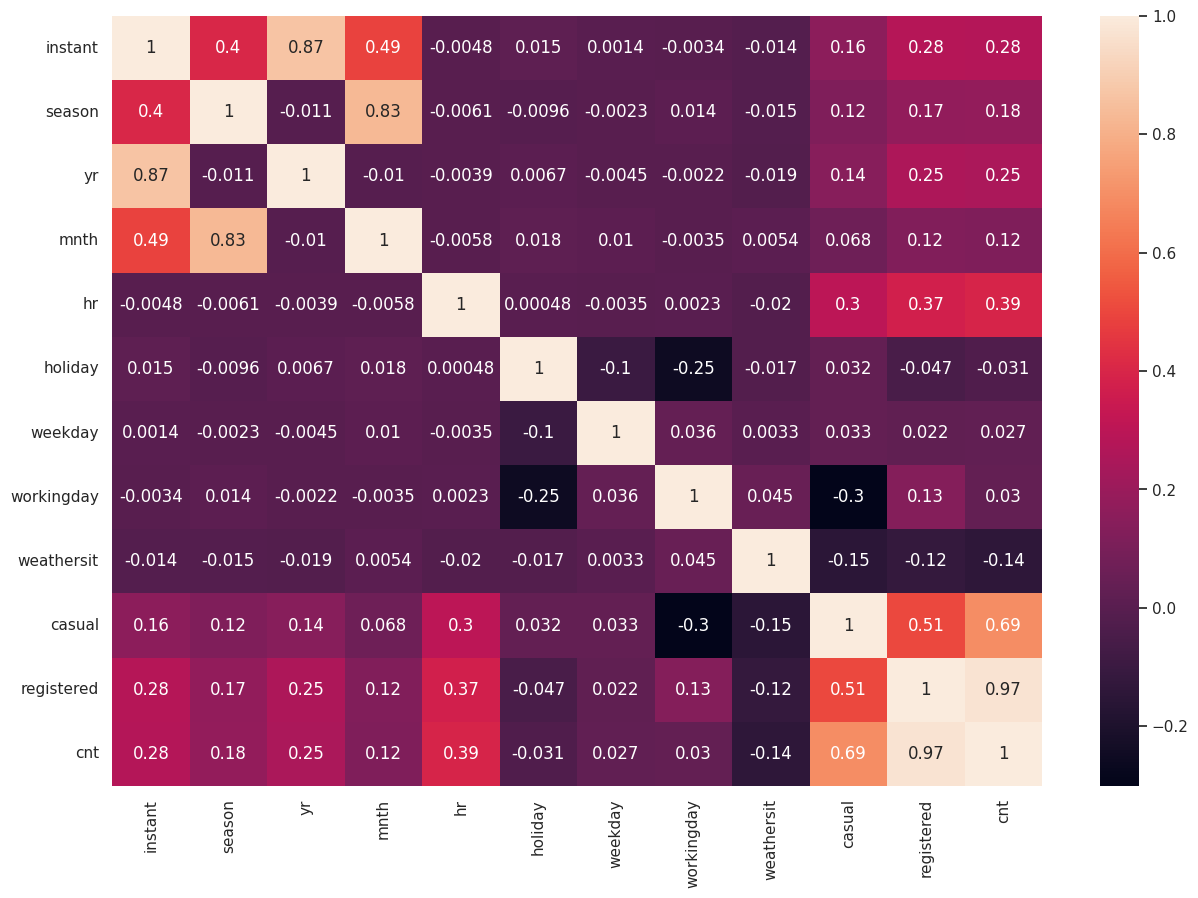

In [27]:
# Membuat plot heatmap dari korelasi data numerik dalam data per jam
plt.figure(figsize=(15, 10))
sns.heatmap(hour_data.corr(numeric_only=True), annot=True)

In [28]:
# Menghitung korelasi fitur dan mencari kolom dengan korelasi > 0.7 terhadap kolom lainnya
corr_matrix = hour_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
hour_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-28-66fe31eca324>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = hour_data.corr().abs()


In [29]:
# Karena kolom berikut krusial maka akan dipertahankan
hour_drop_hicorr

['yr', 'mnth', 'cnt']

In [30]:
# Menghitung jumlah nilai unik dalam setiap kolom objek
hour_data.select_dtypes(include='object').nunique()

Series([], dtype: float64)

In [31]:
# Menghitung jumlah nilai unik dalam setiap kolom non-objek
hour_data.select_dtypes(exclude='object').nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
casual          322
registered      776
cnt             869
dtype: int64

In [32]:
# Mencetak nilai dari setiap kolom non-objek dalam bentuk persentase
for col in hour_data.select_dtypes(exclude='object').columns.tolist():
    print(hour_data[col].value_counts(normalize=True)*100)
    print('\n')

1        0.005754
11592    0.005754
11578    0.005754
11579    0.005754
11580    0.005754
           ...   
5799     0.005754
5800     0.005754
5801     0.005754
5802     0.005754
17379    0.005754
Name: instant, Length: 17379, dtype: float64


2011-01-01    0.138098
2012-04-03    0.138098
2012-04-28    0.138098
2012-04-29    0.138098
2012-04-30    0.138098
                ...   
2011-01-26    0.092065
2011-01-18    0.069049
2012-10-30    0.063295
2011-01-27    0.046033
2012-10-29    0.005754
Name: dteday, Length: 731, dtype: float64


3    25.870303
2    25.369699
1    24.408769
4    24.351228
Name: season, dtype: float64


1    50.256056
0    49.743944
Name: yr, dtype: float64


5     8.562058
7     8.562058
12    8.533287
8     8.487255
3     8.475747
10    8.349157
6     8.285862
4     8.268600
9     8.268600
11    8.268600
1     8.222567
2     7.716209
Name: mnth, dtype: float64


17    4.200472
16    4.200472
13    4.194718
15    4.194718
14    4.194718
12    4.188964
22    4.188

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah total sepeda yang dipinjam di setiap musim pada tahun 2011?

In [33]:
# Mendefinisikan keterangan musim
seasons = {
    1: "spring",
    2: "summer",
    3: "autumn",
    4: "winter"
}

# Menghitung jumlah total sepeda yang dipinjam untuk setiap musim
season_counts = [day_data[(day_data["yr"] == 0) & (day_data["season"] == season_code)]["cnt"].sum() for season_code in seasons]

# Loop untuk menampilkan hasil
for season_name, season_count in zip(seasons.values(), season_counts):
    print(f"Jumlah sepeda dipinjam pada {season_name} tahun 2011: {season_count}")

Jumlah sepeda dipinjam pada spring tahun 2011: 150000
Jumlah sepeda dipinjam pada summer tahun 2011: 347316
Jumlah sepeda dipinjam pada autumn tahun 2011: 419650
Jumlah sepeda dipinjam pada winter tahun 2011: 326137


###  Pertanyaan 2: Berapa jumlah total sepeda per bulan yang dipinjam pada tahun 2012?

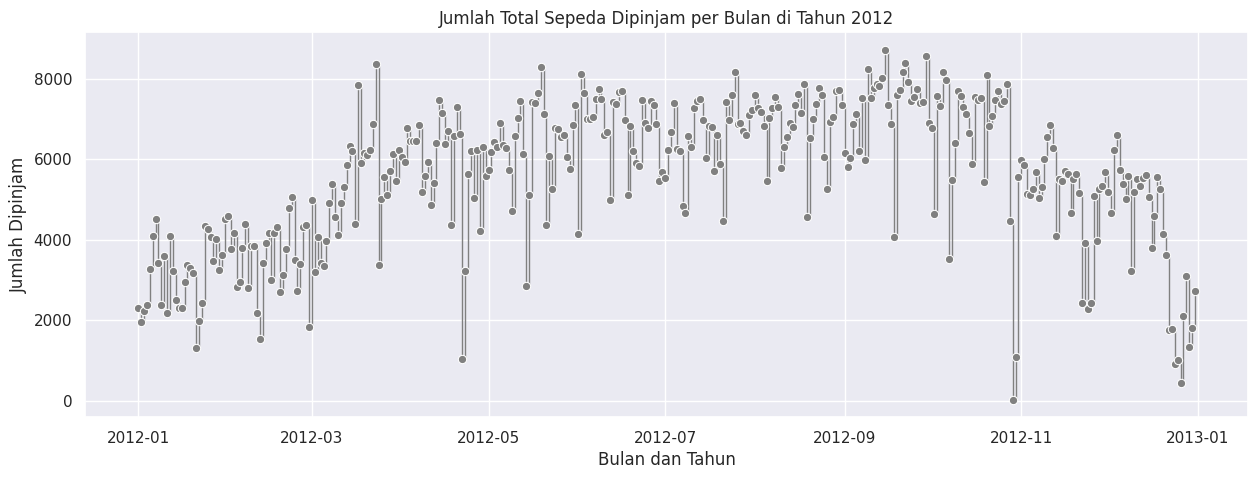

In [34]:
# Memfilter data untuk tahun 2012
day_count_2011 = day_data[day_data["yr"] == 1]

# Membuat plot dengan sumbu x adalah tanggal dan sumbu y adalah jumlah sepeda
plt.figure(figsize=(15, 5))
sns.lineplot(x="dteday", y="cnt", data=day_count_2011, linewidth=1, color='grey', marker='o', drawstyle='steps-post')

# Menyertakan abel untuk sumbu x dan y serta judul plot
plt.xlabel("Bulan dan Tahun")
plt.ylabel("Jumlah Dipinjam")
plt.title("Jumlah Total Sepeda Dipinjam per Bulan di Tahun 2012")

# Menampilkan plot
plt.show()

### Pertanyaan 3: Berapa jumlah total sepeda per bulan yang dipinjam oleh peminjam terdaftar maupun tidak pada tahun 2011 sampai 2012?

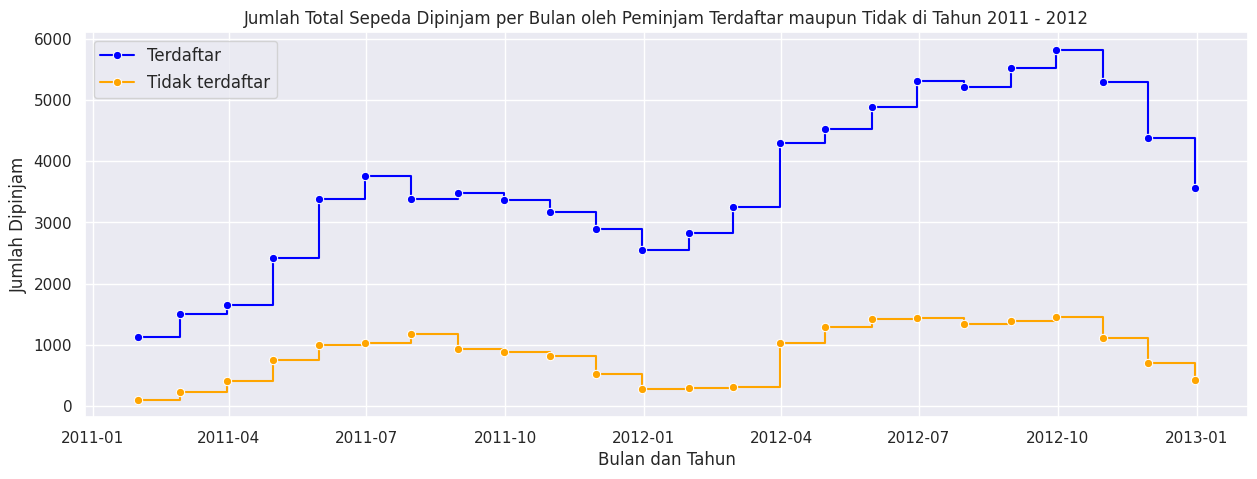

In [35]:
# Mengelompokkan data berdasarkan bulan ('M') dan melakukan agregasi untuk kolom 'casual', 'registered', dan 'cnt'
day_count_all = day_data.resample(rule='M', on='dteday').mean()

# Membuat plot untuk jumlah sepeda yang terdaftar dan tidak terdaftar per bulan
plt.figure(figsize=(15, 5))
sns.lineplot(x=day_count_all.index, y="registered", data=day_count_all, color='blue', label='Terdaftar', marker='o', drawstyle='steps-post')
sns.lineplot(x=day_count_all.index, y="casual", data=day_count_all, color='orange', label='Tidak terdaftar', linestyle='-', marker='o', drawstyle='steps-post')

# Menyertakan label sumbu x dan y serta judul plot
plt.xlabel("Bulan dan Tahun")
plt.ylabel("Jumlah Dipinjam")
plt.title("Jumlah Total Sepeda Dipinjam per Bulan oleh Peminjam Terdaftar maupun Tidak di Tahun 2011 - 2012")

# Menampilkan legenda
plt.legend(loc='upper left', fontsize=12)

# Menampilkan plot
plt.show()


### Pertanyaan 4: Apakah terdapat perbedaan signifikan dalam penggunaan sepeda antara lima jam tertinggi dan lima jam terendah? Jika ya, apa yang menyebabkannya?

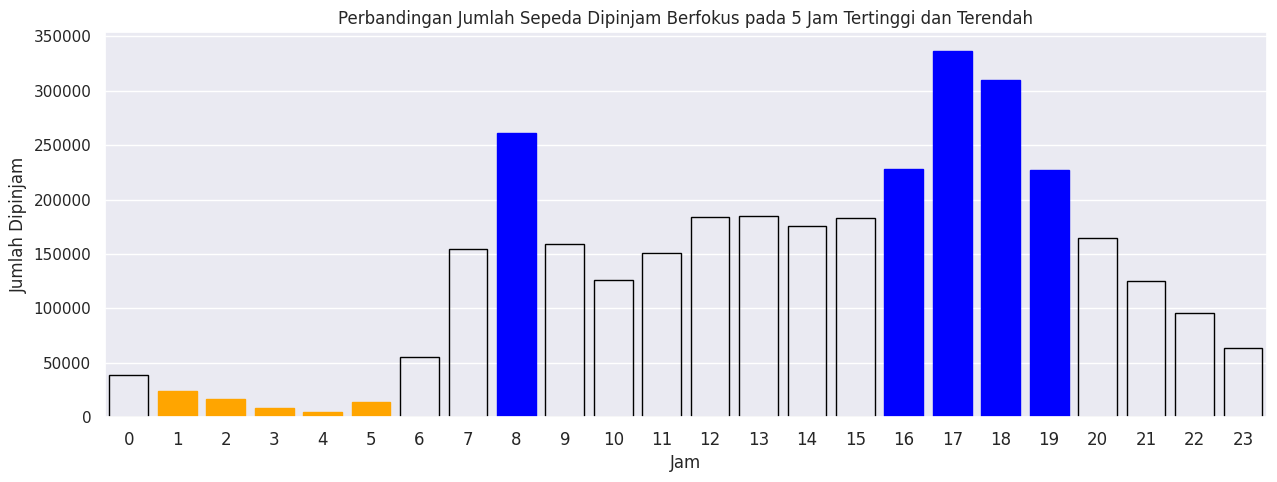

In [36]:
# Mengelompokkan data berdasarkan jam ('hr') dan menjumlahkan kolom 'cnt', lalu diurutkan
hour_count_all = hour_data.groupby("hr")["cnt"].sum().sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(15, 5))

# Membuat barplot dengan data yang sudah diurutkan
barplot = sns.barplot(x=hour_count_all.index, y=hour_count_all.values, linewidth=1, edgecolor='black', facecolor='none')

# Mengatur label dan judul
plt.ylabel("Jumlah Dipinjam")
plt.xlabel("Jam")
plt.title("Perbandingan Jumlah Sepeda Dipinjam Berfokus pada 5 Jam Tertinggi dan Terendah")

# Mengatur ukuran label sumbu x
plt.xticks(fontsize=12)

# Mengambil 5 jam tertinggi dan terendah
top_hours = hour_count_all.head(5)
bottom_hours = hour_count_all.tail(5)

# Mengubah warna garis bar dengan nilai tertinggi menjadi biru dan nilai terendah menjadi orange
for bar in barplot.patches:
    if bar.get_height() in top_hours.values:
        bar.set_color('blue')
    elif bar.get_height() in bottom_hours.values:
        bar.set_color('orange')

# Menampilkan plot
plt.show()

### Pertanyaan 5: Berapa rata-rata frekuensi sepeda yang dipinjam di hari kerja dan hari libur berdasarkan jam?

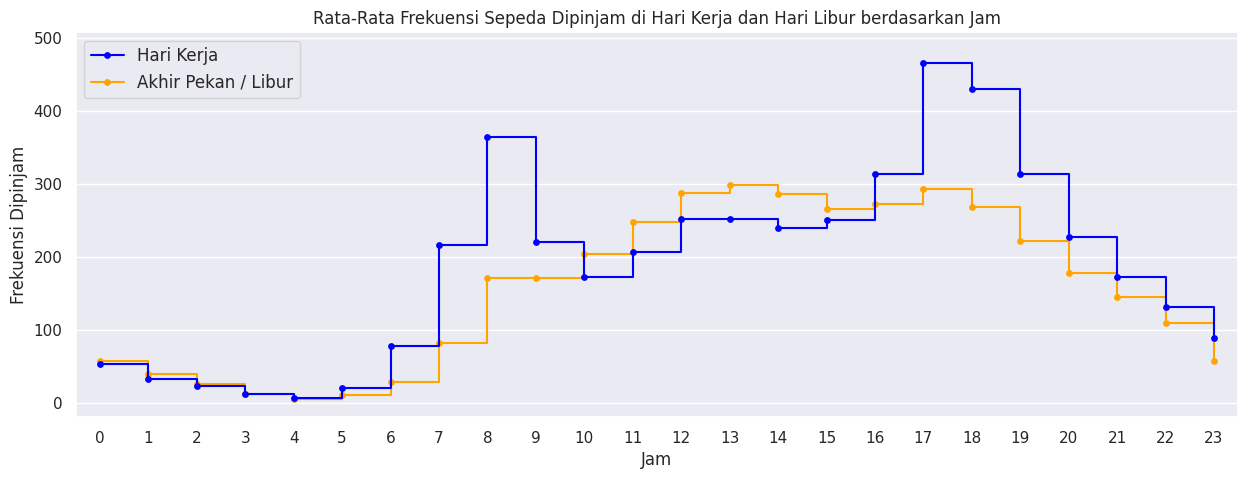

In [37]:
# Membuat kolom baru untuk menandai workingday
hour_data['workingday'] = (hour_data['holiday'] == 0).astype(int)

# Membuat point plot untuk melihat produktivitas berbagi sepeda berdasarkan waktu
plt.figure(figsize=(15, 5))
plot = sns.pointplot(data=hour_data, x='hr', y='cnt', hue='workingday', palette={0: 'orange', 1: 'blue'}, markers=["o", "o"], linewidth=1.5, err_kws={'linewidth': 0}, drawstyle='steps-post')

# Mengatur judul dan label
plt.title('Rata-Rata Frekuensi Sepeda Dipinjam di Hari Kerja dan Hari Libur berdasarkan Jam')
plt.ylabel('Frekuensi Dipinjam')
plt.xlabel('Jam')

# Mengubah informasi legenda
handles, labels = plot.get_legend_handles_labels()
handles = handles[::-1]  # Membalik urutan handle
labels = ['Hari Kerja', 'Akhir Pekan / Libur']  # Membalik urutan label
plt.legend(handles, labels, loc='upper left', fontsize=12)

# Menampilkan plot
plt.show()

## Conclusion

- Berapa jumlah total sepeda yang dipinjam di setiap musim pada tahun 2011?
  - Tren umumnya menunjukkan bahwa permintaan peminjaman sepeda meningkat dari musim semi ke musim panas, mencapai puncaknya di musim gugur, dan kemudian sedikit menurun di musim dingin, yang mungkin dipengaruhi oleh kondisi cuaca dan aktivitas musiman.
- Berapa jumlah total sepeda per bulan yang dipinjam pada tahun 2012?
  - Pada kuartal pertama (Januari hingga Maret), terjadi peningkatan konsisten dalam jumlah sepeda yang dipinjam dari awal tahun.
  - Peningkatan ini terus berlanjut menuju kuartal kedua (April hingga Juni), menunjukkan permintaan yang terus meningkat dari pengguna sepeda.
  - Setelah mencapai puncaknya di kuartal kedua, jumlah sepeda yang dipinjam cenderung stabil selama kuartal ketiga (Juli hingga September).
  - Namun, pada kuartal keempat (Oktober hingga Desember), terjadi penurunan cukup drastis dalam jumlah sepeda yang dipinjam saat mendekati akhir tahun baru.
- Berapa jumlah total sepeda per bulan yang dipinjam oleh peminjam terdaftar maupun tidak pada tahun 2011 sampai 2012?
  - Baik peminjam terdaftar maupun tidak, keduanya menunjukkan tren yang serupa setiap tahunnya, meskipun dengan jumlah yang berbeda-beda.
  - Pada awal tahun, jumlah sepeda yang dipinjam cenderung rendah, kemudian mulai meningkat menuju kuartal kedua (April hingga Juni).
  - Menuju pertengahan tahun (kuartal ketiga), terjadi penurunan dalam jumlah sepeda yang dipinjam, meskipun tidak signifikan.
  - Jumlah sepeda yang dipinjam mencapai puncaknya di pertengahan kuartal ketiga hingga awal kuartal keempat (Juli hingga Oktober), setelah itu mengalami penurunan drastis menjelang awal tahun baru.
  - Meskipun trennya serupa, jumlah peminjam yang terdaftar jauh lebih banyak dibandingkan dengan yang tidak terdaftar, seperti yang terlihat dari perbedaan antara garis biru (peminjam terdaftar) dan garis merah (peminjam tidak terdaftar) dalam plot.
- Apakah terdapat perbedaan signifikan dalam penggunaan sepeda antara lima jam tertinggi dan lima jam terendah? Jika ya, apa yang menyebabkannya?
  - Terdapat perbedaan signifikan dalam penggunaan sepeda antara lima jam tertinggi dan lima jam terendah:
    - Jam-jam dengan jumlah sepeda dipinjam tertinggi, yaitu pada pukul 08:00 dan 16:00-19:00, menunjukkan bahwa sepeda banyak digunakan saat pagi hari dan sore hari, yang kemungkinan besar terjadi pada jam-jam menuju dan meninggalkan tempat kerja atau sekolah.
    - Sementara itu, jam-jam dengan jumlah sepeda dipinjam terendah, yaitu pada pukul 01:00-05:00, menunjukkan bahwa sepeda jarang digunakan pada malam hari dan dini hari, yang mungkin disebabkan karena mayoritas orang sedang beristirahat atau tidur pada jam-jam tersebut.
  - Faktor-faktor yang menyebabkan perbedaan ini antara lain adalah:
    - Kebutuhan transportasi untuk beraktivitas pagi dan pulang dari tempat kerja atau sekolah.
    - Kondisi lalu lintas dan waktu istirahat alami manusia.
    - Pola aktivitas masyarakat yang lebih aktif pada siang dan sore hari dibandingkan malam hari.
- Berapa rata-rata frekuensi sepeda yang dipinjam di hari kerja dan hari libur berdasarkan jam?
  - Di hari kerja terjadi lonjakan sepeda dipinjam dari pukul 05:00 mencapai puncak pada pukul 08:00, kemudian menurun hingga pukul 10:00. Terjadi lonjakan kembali hingga pukul 17:00, sebelum perlahan menurun hingga pagi berikutnya, mencerminkan aktivitas transportasi menuju dan dari tempat kerja.
  - Di akhir pekan, jumlah sepeda dipinjam meningkat stabil dari pukul 05:00 tanpa lonjakan signifikan, mencapai puncak pada pukul 18:00 sebelum kemudian menurun. Hal ini mungkin karena digunakan untuk rekreasi atau kegiatan sosial selama akhir pekan dan hari libur.